In [4]:
#importing libraries
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import shutil
from tensorflow.keras.models import load_model

C:\Users\alexb\AppData\Local\Temp\ipykernel_8148\3834934945.py:5: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
#limit gpu usage
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
data_dir = 'data'

In [4]:
# allowed extensions
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [5]:
# view image and convert from BGR to RGB
# creates numpy array for the image
# img = cv2.imread(os.path.join('data', 'happy', 'smile.woman_.jpg'))
# img.shape
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()

In [6]:
# access both directories for happy and sad
for image_class in os.listdir(data_dir):
    # access each image in the respective directories
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # get the image path 
        image_path = os.path.join(data_dir, image_class, image)
        try:
            #img = cv2.imread(image_path)
            # get extension of image
            tip = imghdr.what(image_path)
            # if the extension is not in the list of valid extension then remove it
            if tip not in image_exts:
                print('Image not in ext list {}'.formate(image_path))
                # remove the image path
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

In [7]:
# loads images from directory 
# each sub directory is a class label
data = tf.keras.utils.image_dataset_from_directory(data_dir)

happy_dir = os.path.join(data_dir, 'happy')
sad_dir = os.path.join(data_dir, 'sad')

num_happy = len(os.listdir(happy_dir))
num_sad = len(os.listdir(sad_dir))

print(f"Number of images in 'happy' class: {num_happy}")
print(f"Number of images in 'sad' class: {num_sad}")

Found 290 files belonging to 2 classes.
Number of images in 'happy' class: 163
Number of images in 'sad' class: 127


In [8]:
# this converts the data from tensors to numpy arrays
data_iterator = data.as_numpy_iterator()

In [9]:
# Images represented as numpy arrays
batch = data_iterator.next()

In [10]:
# 1 equals sad
# 0 equals happy

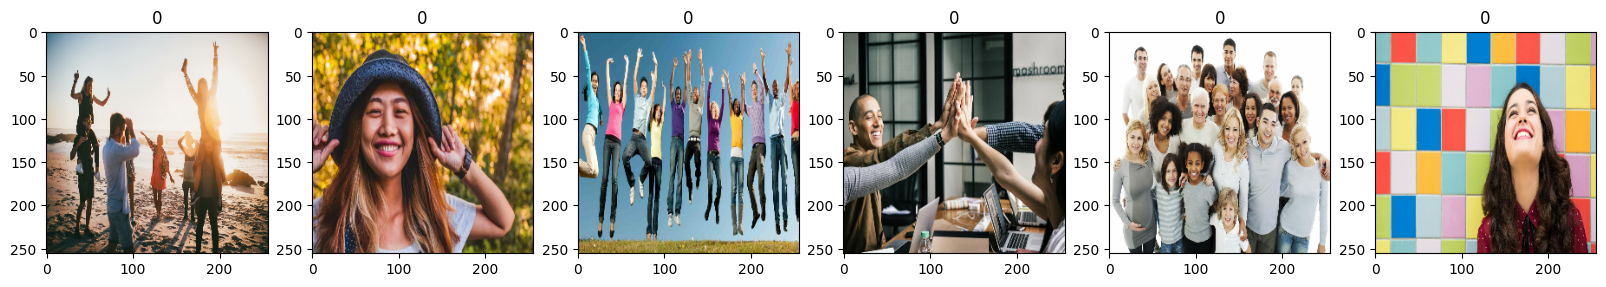

In [11]:
# number of images to produce
number_of_images = 6
# create a set of subplots 'ax' and a figure 'fig'
fig, ax = plt.subplots(ncols=number_of_images, figsize=(20,20))
# take only the first 'number_of_images' from batch
# get the index and the value using enumerate
for idx, img in enumerate(batch[0][:number_of_images]):
    # display the images
    ax[idx].imshow(img.astype(int))
    #display the labels
    ax[idx].title.set_text(batch[1][idx])

In [12]:
data = data.map(lambda x, y: (x/255, y))

In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

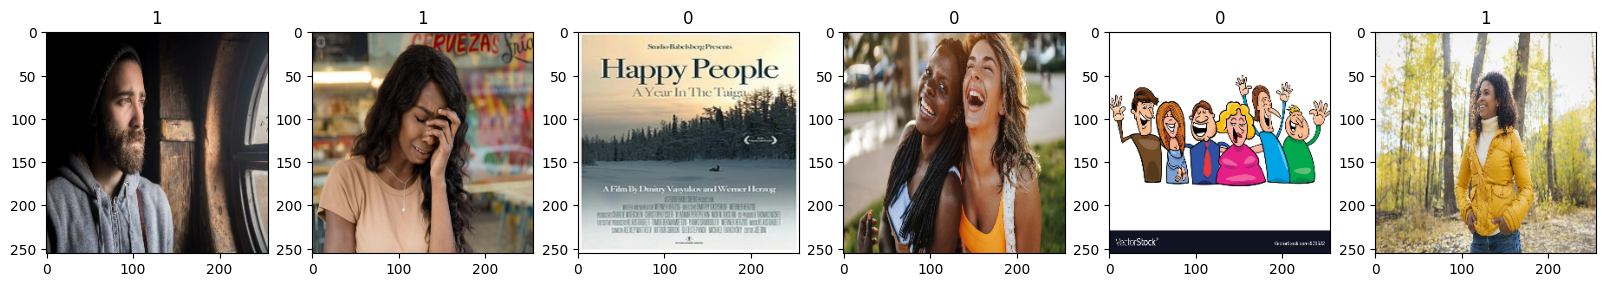

In [15]:
# number of images to produce
number_of_images = 6
# create a set of subplots 'ax' and a figure 'fig'
fig, ax = plt.subplots(ncols=number_of_images, figsize=(20,20))
# take only the first 'number_of_images' from batch
# get the index and the value using enumerate
for idx, img in enumerate(batch[0][:number_of_images]):
    # display the images
    ax[idx].imshow(img)
    #display the labels
    ax[idx].title.set_text(batch[1][idx])

In [16]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1) + 1

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [22]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 6s 642ms/step - loss: 1.4267 - accuracy: 0.5223 - val_loss: 0.6531 - val_accuracy: 0.6562
Epoch 2/20
7/7 [==============================] - 5s 614ms/step - loss: 0.6558 - accuracy: 0.5625 - val_loss: 0.5942 - val_accuracy: 0.7500
Epoch 3/20
7/7 [==============================] - 6s 622ms/step - loss: 0.6273 - accuracy: 0.6875 - val_loss: 0.6041 - val_accuracy: 0.6250
Epoch 4/20
7/7 [==============================] - 6s 625ms/step - loss: 0.5556 - accuracy: 0.7634 - val_loss: 0.4577 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 6s 620ms/step - loss: 0.4924 - accuracy: 0.7634 - val_loss: 0.5100 - val_accuracy: 0.6562
Epoch 6/20
7/7 [==============================] - 6s 620ms/step - loss: 0.4487 - accuracy: 0.7768 - val_loss: 0.3712 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 6s 682ms/step - loss: 0.3933 - accuracy: 0.8214 - val_loss: 0.3389 - val_accuracy: 0.8281
Epoch 8/20
7/7 [====

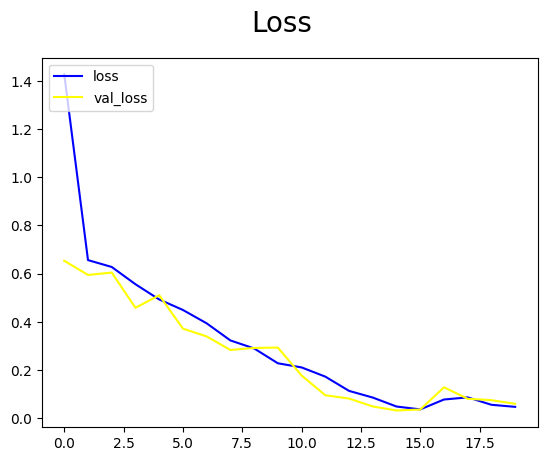

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='yellow', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

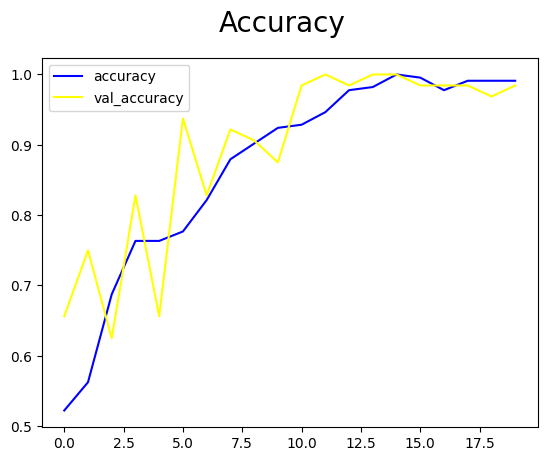

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='yellow', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [26]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [27]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [28]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 74ms/step


In [29]:
print(f'Precision:{precision.result().numpy()}')
print(f'Recall:{recall.result().numpy()}')
print(f'Accuracy:{accuracy.result().numpy()}')

Precision:1.0
Recall:1.0
Accuracy:1.0


In [33]:
model.save(os.path.join('models', 'happysadmodel.h5'))

C:\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [38]:
def predict_test_images(model, test_folder='testimages'):
    """Predict class labels for all images in the given folder."""
    for filename in os.listdir(test_folder):
        image_path = os.path.join(test_folder, filename)
        
        # Read and preprocess the image
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resize_img = tf.image.resize(img_rgb, (256, 256))
        norm_img = resize_img / 255.0
        
        # Model prediction
        prediction = model.predict(np.expand_dims(norm_img, axis=0))
        
        # Display the image and its prediction
        plt.imshow(norm_img)
        if prediction > 0.5:
            plt.title(f"Predicted: Sad with probability {prediction[0][0]:.2f}")
        else:
            plt.title(f"Predicted: Happy with probability {1 - prediction[0][0]:.2f}")

        plt.axis('off')
        plt.show()

        answer = input("Correct Answer: ")
        print(answer)
        try:
            if(answer == "Happy" or answer == "happy"):
                source_path = test_src
                destination_path = 'data/happy/'
                shutil.move(image_path, destination_path)
                print(f"Moved {image_path} to {destination_path}")
            elif(answer == "Sad" or answer == "sad"):
                source_path = test_src
                destination_path = 'data/sad/'
                shutil.move(image_path, destination_path)
                print(f"Moved {image_path} to {destination_path}")
        except Exception as e:
            print("Issue with path {}".format(e))


1/1 [==============================] - 0s 19ms/step


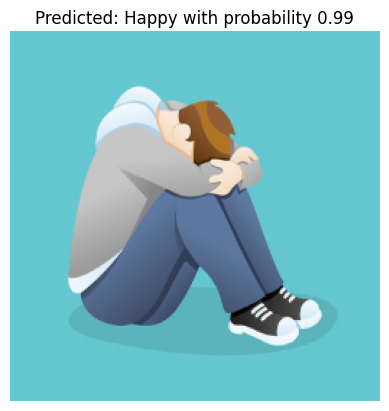

Correct Answer:  sad


sad
Moved testimages\360_F_312003378_ugkvfeH1D9hBKpKUh4x9wMk2Ohom5vDq.jpg to data/sad/
1/1 [==============================] - 0s 17ms/step


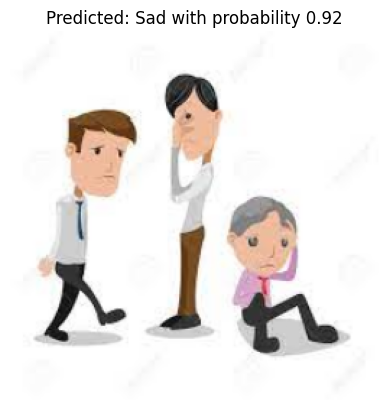

Correct Answer:  sad


sad
Moved testimages\download (1).jpg to data/sad/
1/1 [==============================] - 0s 17ms/step


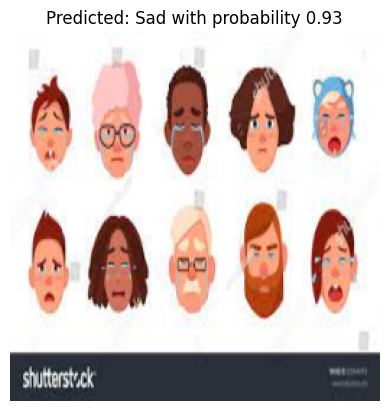

Correct Answer:  sad


sad
Moved testimages\download (2).jpg to data/sad/
1/1 [==============================] - 0s 18ms/step


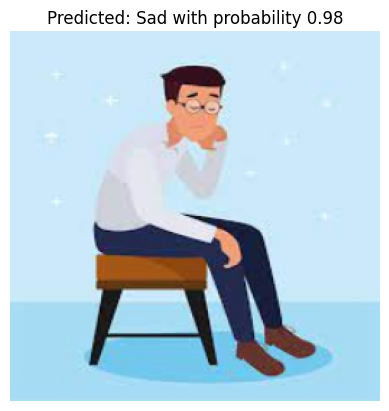

Correct Answer:  sad


sad
Moved testimages\download (3).jpg to data/sad/
1/1 [==============================] - 0s 17ms/step


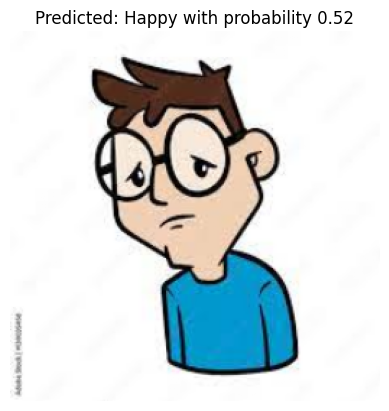

Correct Answer:  sad


sad
Moved testimages\download.jpg to data/sad/
1/1 [==============================] - 0s 17ms/step


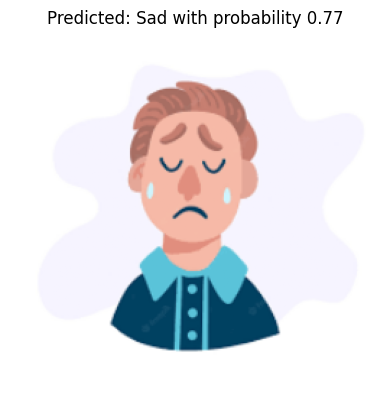

Correct Answer:  sad


sad
Moved testimages\download.png to data/sad/


In [39]:
predict_test_images(new_model)